Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
!pip install scikit-learn==1.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
pip install --upgrade scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


Data Collection and Processing

In [ ]:
heart_data=pd.read_csv('/content/heart_disease.csv')

# New Section

In [ ]:
# print first 20 rows of the dataset
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)
# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_validation:", X_validation.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_validation:", Y_validation.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (242, 13)
Shape of X_validation: (30, 13)
Shape of X_test: (31, 13)
Shape of Y_train: (242,)
Shape of Y_validation: (30,)
Shape of Y_test: (31,)


Histogram

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

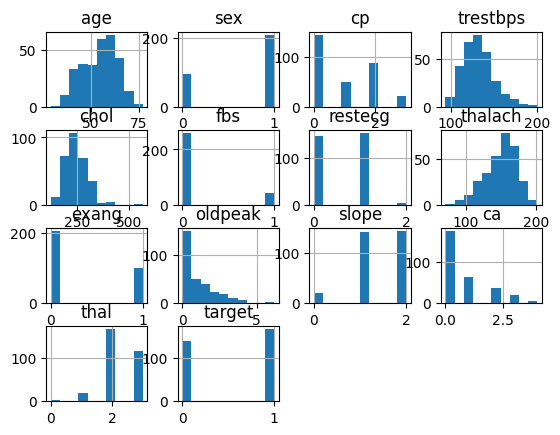

In [ ]:
heart_data.hist()

<Axes: ylabel='Frequency'>

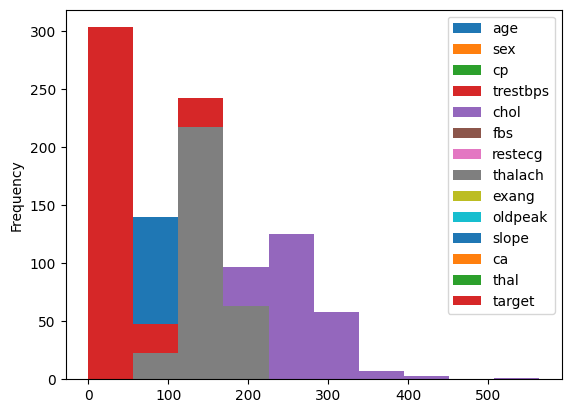

In [ ]:
heart_data.plot(kind='hist')

Scatter PLot

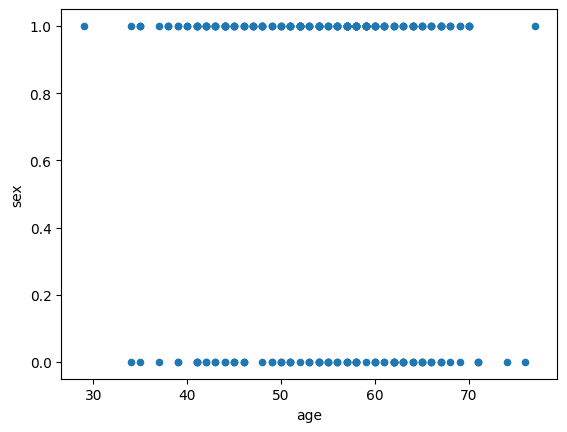

In [ ]:
heart_data.plot(kind='scatter',x='age',y='sex')
plt.show()

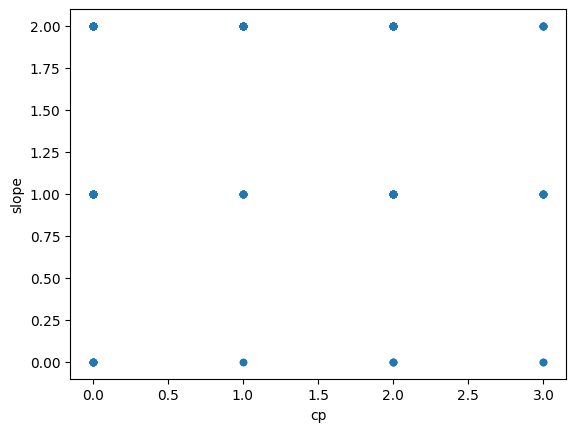

In [ ]:
heart_data.plot(kind='scatter',x='cp',y='slope')
plt.show()

Model Training

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


Support vector mechine

In [ ]:
# # Create and train a linear SVM model
# h_model =svm.SVC(kernel='linear')
# h_model.fit(X_train, Y_train)

Logistic Regression

In [ ]:
# h_model = LogisticRegression()
# h_model.fit(X_train, Y_train)

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import the k-NN classifier
# Create a k-NN model
h_model = KNeighborsClassifier(n_neighbors=5)
# Train the k-NN model with the training data
h_model.fit(X_train, Y_train)

KNeighborsClassifier()

CNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
# Split the data into training and combined validation/testing sets (80% train, 20% val/test)
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
# Split the combined validation/testing set into validation and testing sets (50% val, 50% test)
X_validation, X_test, Y_validation, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, stratify=Y_val_test, random_state=2)
# Convert DataFrame columns to NumPy arrays and reshape for compatibility with Conv1D
X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_validation_reshaped = np.array(X_validation).reshape(X_validation.shape[0], X_validation.shape[1], 1)
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
# Build the CNN model
h_model = models.Sequential()
h_model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
h_model.add(layers.MaxPooling1D(2))
h_model.add(layers.Flatten())
h_model.add(layers.Dense(64, activation='relu'))
h_model.add(layers.Dense(1, activation='sigmoid'))
# Compile the model
h_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model
h_model.fit(X_train_reshaped, Y_train, epochs=10, batch_size=32, validation_data=(X_validation_reshaped, Y_validation))
# Evaluate the model on the training set
train_loss, train_acc = h_model.evaluate(X_train_reshaped, Y_train)
print(f'Training Accuracy: {train_acc}')

# Evaluate the model on the test set
test_loss, test_acc = h_model.evaluate(X_test_reshaped, Y_test)
print(f'Test Accuracy: {test_acc}')
# Make predictions on the training set
Y_train_predictions = (h_model.predict(X_train_reshaped) > 0.5).astype(int)
# Make predictions on the test set
Y_test_predictions = (h_model.predict(X_test_reshaped) > 0.5).astype(int)
cnn
Calculate evaluation metrics for training data
accuracy_train = accuracy_score(Y_train, Y_train_predictions)
precision_train = precision_score(Y_train, Y_train_predictions)
recall_train = recall_score(Y_train, Y_train_predictions)
f1_train = f1_score(Y_train, Y_train_predictions)
confusion_matrix_train = confusion_matrix(Y_train, Y_train_predictions)

# Calculate evaluation metrics for test data
accuracy_test = accuracy_score(Y_test, Y_test_predictions)
precision_test = precision_score(Y_test, Y_test_predictions)
recall_test = recall_score(Y_test, Y_test_predictions)
f1_test = f1_score(Y_test, Y_test_predictions)
confusion_matrix_test = confusion_matrix(Y_test, Y_test_predictions)
print('Training Accuracy:', accuracy_train)
print('Precision on the training data:', precision_train)
print('Recall on the training data:', recall_train)
print('F1 Score on the training data:', f1_train)
print('Confusion matrix on the training data:')
print(confusion_matrix_train)

print('Test Accuracy:', accuracy_test)
print('Precision on the testing data:', precision_test)
print('Recall on the testing data:', recall_test)
print('F1 Score on the testing data:', f1_test)
print('Confusion matrix on the testing data:')
print(confusion_matrix_test)


SyntaxError: ignored

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Assuming your model is named h_model
threshold = 0.5  # You can adjust this threshold as needed

# Predictions on training set
X_train_prediction = (h_model.predict(X_train) > threshold).astype(int)
accuracy_train = accuracy_score(Y_train, X_train_prediction)
precision_train = precision_score(Y_train, X_train_prediction)
recall_train = recall_score(Y_train, X_train_prediction)
f1_train = f1_score(Y_train, X_train_prediction)
confusion_matrix_train = confusion_matrix(Y_train, X_train_prediction)
# Predictions on test set
X_test_prediction = (h_model.predict(X_test) > threshold).astype(int)
accuracy_test = accuracy_score(Y_test, X_test_prediction)
precision_test = precision_score(Y_test, X_test_prediction)
recall_test = recall_score(Y_test, X_test_prediction)
f1_test = f1_score(Y_test, X_test_prediction)
confusion_matrix_test = confusion_matrix(Y_test, X_test_prediction)

# Predictions on validation set
X_validation_prediction = (h_model.predict(X_validation) > threshold).astype(int)
accuracy_validation = accuracy_score(Y_validation, X_validation_prediction)
precision_validation = precision_score(Y_validation, X_validation_prediction)
recall_validation = recall_score(Y_validation, X_validation_prediction)
f1_validation = f1_score(Y_validation, X_validation_prediction)
confusion_matrix_validation = confusion_matrix(Y_validation, X_validation_prediction)
print('Accuracy score on the training data:', accuracy_train)
print('Accuracy score on the testing data:', accuracy_test)
print('Accuracy score on the validation data:', accuracy_validation)
print('Precision score on the training data:', precision_train)
print('Precision score on the testing data:', precision_test)
print('Precision score on the validation data:', precision_validation)
print('Sensitivity (Recall) score on the training data:', recall_train)
print('Sensitivity (Recall) score on the testing data:', recall_test)
print('Sensitivity (Recall) score on the validation data:', recall_validation)
print('F1 score on the training data:', f1_train)
print('F1 score on the testing data:', f1_test)
print('F1 score on the validation data:', f1_validation)
print('Confusion matrix on the training data:')
print(confusion_matrix_train)
print('Confusion matrix on the testing data:')
print(confusion_matrix_test)
print('Confusion matrix on the validation data:')
print(confusion_matrix_validation)

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import numpy as np

# # Example data (replace with your actual data)
# X_combined = np.random.rand(100, 10)  # Replace with your features
# Y_combined = np.random.randint(2, size=100)  # Replace with your labels (binary classification)

# # Lists to store metrics for each fold
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# confusion_matrices = []

# # Create a linear SVM model
# h_model = SVC(kernel='linear')

# # Perform K-fold cross-validation and calculate metrics for each fold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of splits as needed
# for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Train the SVM model
#     h_model.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold = h_model.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
#     precision_fold = precision_score(Y_test_fold, Y_pred_fold)
#     recall_fold = recall_score(Y_test_fold, Y_pred_fold)
#     f1_fold = f1_score(Y_test_fold, Y_pred_fold)
#     confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

#     # Print metrics and confusion matrix for each fold
#     print(f"\nMetrics - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold}")
#     print(f"Precision: {precision_fold}")
#     print(f"Recall (Sensitivity): {recall_fold}")
#     print(f"F1 Score: {f1_fold}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold}")

#     # Append metrics to the respective lists
#     accuracy_scores.append(accuracy_fold)
#     precision_scores.append(precision_fold)
#     recall_scores.append(recall_fold)
#     f1_scores.append(f1_fold)
#     confusion_matrices.append(confusion_matrix_fold)

# # Calculate and print the average metrics across folds
# average_accuracy = np.mean(accuracy_scores)
# average_precision = np.mean(precision_scores)
# average_recall = np.mean(recall_scores)
# average_f1 = np.mean(f1_scores)

# print("\nOverall Metrics:")
# print(f"Average Accuracy: {average_accuracy}")
# print(f"Average Precision: {average_precision}")
# print(f"Average Recall (Sensitivity): {average_recall}")
# print(f"Average F1 Score: {average_f1}")

# # Calculate and print the overall confusion matrix
# overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
# print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")

# #LR
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# from sklearn.model_selection import StratifiedKFold
# import numpy as np

# # Lists to store metrics for each fold
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# confusion_matrices = []

# # Create an SVM classifier
# classifier = SVC(kernel='linear')  # You can adjust the kernel as needed

# # Perform Stratified K-fold cross-validation and calculate metrics for each fold
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# for i, (train_index, test_index) in enumerate(kf.split(X_combined, Y_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Train the SVM classifier
#     classifier.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold = classifier.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
#     precision_fold = precision_score(Y_test_fold, Y_pred_fold)
#     recall_fold = recall_score(Y_test_fold, Y_pred_fold)
#     f1_fold = f1_score(Y_test_fold, Y_pred_fold)
#     confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

#     # Print metrics and confusion matrix for each fold
#     print(f"\nMetrics - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold}")
#     print(f"Precision: {precision_fold}")
#     print(f"Recall (Sensitivity): {recall_fold}")
#     print(f"F1 Score: {f1_fold}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold}")

#     # Append metrics to the respective lists
#     accuracy_scores.append(accuracy_fold)
#     precision_scores.append(precision_fold)
#     recall_scores.append(recall_fold)
#     f1_scores.append(f1_fold)
#     confusion_matrices.append(confusion_matrix_fold)

# # Calculate and print the average metrics across folds
# average_accuracy = np.mean(accuracy_scores)
# average_precision = np.mean(precision_scores)
# average_recall = np.mean(recall_scores)
# average_f1 = np.mean(f1_scores)

# print("\nOverall Metrics:")
# print(f"Average Accuracy: {average_accuracy}")
# print(f"Average Precision: {average_precision}")
# print(f"Average Recall (Sensitivity): {average_recall}")
# print(f"Average F1 Score: {average_f1}")

# # Calculate and print the overall confusion matrix
# overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
# print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
import numpy as np

# # Function to build and train the k-NN model
# def build_knn_model():
#     return KNeighborsClassifier(n_neighbors=5)

# # Lists to store metrics for each fold
# accuracy_scores = []
# precision_scores = []
# recall_scores = []
# f1_scores = []
# confusion_matrices = []

# # Perform K-fold cross-validation and calculate metrics for each fold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Assuming 5 folds
# for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
#     X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
#     Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

#     # Build and train the k-NN model
#     knn_model = build_knn_model()
#     knn_model.fit(X_train_fold, Y_train_fold)

#     # Make predictions on the test set
#     Y_pred_fold = knn_model.predict(X_test_fold)

#     # Calculate metrics for the fold
#     accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
#     precision_fold = precision_score(Y_test_fold, Y_pred_fold)
#     recall_fold = recall_score(Y_test_fold, Y_pred_fold)
#     f1_fold = f1_score(Y_test_fold, Y_pred_fold)
#     confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

#     # Print metrics and confusion matrix for each fold
#     print(f"\nMetrics - Fold {i + 1}:")
#     print(f"Accuracy: {accuracy_fold}")
#     print(f"Precision: {precision_fold}")
#     print(f"Recall: {recall_fold}")
#     print(f"F1 Score: {f1_fold}")
#     print(f"Confusion Matrix:\n{confusion_matrix_fold}")

#     # Append metrics to the respective lists
#     accuracy_scores.append(accuracy_fold)
#     precision_scores.append(precision_fold)
#     recall_scores.append(recall_fold)
#     f1_scores.append(f1_fold)
#     confusion_matrices.append(confusion_matrix_fold)

# # Calculate and print the average metrics across folds
# average_accuracy = np.mean(accuracy_scores)
# average_precision = np.mean(precision_scores)
# average_recall = np.mean(recall_scores)
# average_f1 = np.mean(f1_scores)

# print("\nOverall Metrics:")
# print(f"Average Accuracy: {average_accuracy}")
# print(f"Average Precision: {average_precision}")
# print(f"Average Recall: {average_recall}")
# print(f"Average F1 Score: {average_f1}")

# # Calculate and print the overall confusion matrix
# overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
# print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")

import numpy as np
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras import layers, models

# Assuming your data is X_combined and Y_combined
# Define the number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2)

# Lists to store metrics for each fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Perform K-fold cross-validation and calculate metrics for each fold
for i, (train_index, test_index) in enumerate(kf.split(X_combined)):
    X_train_fold, X_test_fold = X_combined[train_index], X_combined[test_index]
    Y_train_fold, Y_test_fold = Y_combined[train_index], Y_combined[test_index]

    # Reshape the data for CNN
    X_train_fold_reshaped = X_train_fold.reshape(X_train_fold.shape[0], X_train_fold.shape[1], 1)
    X_test_fold_reshaped = X_test_fold.reshape(X_test_fold.shape[0], X_test_fold.shape[1], 1)

    # Build and train the CNN model
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train_fold.shape[1], 1)))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold_reshaped, Y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    Y_pred_fold = (model.predict(X_test_fold_reshaped) > 0.5).astype(int)

    # Calculate metrics for the fold
    accuracy_fold = accuracy_score(Y_test_fold, Y_pred_fold)
    precision_fold = precision_score(Y_test_fold, Y_pred_fold)
    recall_fold = recall_score(Y_test_fold, Y_pred_fold)
    f1_fold = f1_score(Y_test_fold, Y_pred_fold)
    confusion_matrix_fold = confusion_matrix(Y_test_fold, Y_pred_fold)

    # Print metrics and confusion matrix for each fold
    print(f"\nMetrics - Fold {i + 1}:")
    print(f"Accuracy: {accuracy_fold}")
    print(f"Precision: {precision_fold}")
    print(f"Recall (Sensitivity): {recall_fold}")
    print(f"F1 Score: {f1_fold}")
    print(f"Confusion Matrix:\n{confusion_matrix_fold}")

    # Append metrics to the respective lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)
    confusion_matrices.append(confusion_matrix_fold)

# Calculate and print the average metrics across folds
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("\nOverall Metrics:")
print(f"Average Accuracy: {average_accuracy}")
print(f"Average Precision: {average_precision}")
print(f"Average Recall (Sensitivity): {average_recall}")
print(f"Average F1 Score: {average_f1}")

# Calculate and print the overall confusion matrix
overall_confusion_matrix = np.sum(confusion_matrices, axis=0)
print(f"\nOverall Confusion Matrix:\n{overall_confusion_matrix}")


Building a Predictive System

In [ ]:
# Assuming your input_data is a tuple
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array to a three-dimensional array
# Assuming the model expects input shape (num_samples, num_timesteps, num_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, len(input_data), 1)

# Make predictions
prediction = h_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


Saving the trained model

In [ ]:
import pickle
filename = 'trained_model_heart_sav_CNN'
pickle.dump(h_model, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('trained_model_heart_sav_CNN', 'rb'))

In [ ]:
input_data =(37,1,2,130,250,0,1,187,0,3.5,0,0,2)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshapin array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0] == 0):
  print('The person does not has heart disease')
else:
  print('The person having heart disease ')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracy, precision, recall, and F1 score values (replace with your actual values)
accuracy_train = [0.85, 0.88, 0.90]
precision_train = [0.80, 0.82, 0.85]
recall_train = [0.90, 0.92, 0.88]
f1_train = [0.87, 0.85, 0.87]

accuracy_test = [0.82, 0.79, 0.84]
precision_test = [0.76, 0.75, 0.80]
recall_test = [0.85, 0.82, 0.87]
f1_test = [0.80, 0.78, 0.83]

accuracy_validation = [0.88, 0.86, 0.90]
precision_validation = [0.84, 0.81, 0.87]
recall_validation = [0.92, 0.88, 0.94]
f1_validation = [0.88, 0.85, 0.90]

# Create a range of x values for the graphs
x_values = np.arange(len(accuracy_train))

# Create subplots for each metric
fig, axs = plt.subplots(5, figsize=(10, 16))
fig.suptitle('Performance Metrics Analysis', fontsize=16)

# Accuracy graph
axs[0].plot(x_values, accuracy_train, marker='o', label='Train')
axs[0].plot(x_values, accuracy_test, marker='o', label='Test')
axs[0].plot(x_values, accuracy_validation, marker='o', label='Validation')
axs[0].set_xticks(x_values)
axs[0].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Precision graph
axs[1].plot(x_values, precision_train, marker='o', label='Train')
axs[1].plot(x_values, precision_test, marker='o', label='Test')
axs[1].plot(x_values, precision_validation, marker='o', label='Validation')
axs[1].set_xticks(x_values)
axs[1].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[1].set_ylabel('Precision')
axs[1].legend()

# Recall (Sensitivity) graph
axs[2].plot(x_values, recall_train, marker='o', label='Train')
axs[2].plot(x_values, recall_test, marker='o', label='Test')
axs[2].plot(x_values, recall_validation, marker='o', label='Validation')
axs[2].set_xticks(x_values)
axs[2].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[2].set_ylabel('Sensitivity (Recall)')
axs[2].legend()

# F1 Score graph
axs[3].plot(x_values, f1_train, marker='o', label='Train')
axs[3].plot(x_values, f1_test, marker='o', label='Test')
axs[3].plot(x_values, f1_validation, marker='o', label='Validation')
axs[3].set_xticks(x_values)
axs[3].set_xticklabels(['Metric 1', 'Metric 2', 'Metric 3'])
axs[3].set_ylabel('F1 Score')
axs[3].legend()

# Confusion Matrix graph (replace with your actual confusion matrices)
confusion_matrix_train = np.array([[85, 15], [10, 90]])
confusion_matrix_test = np.array([[75, 25], [15, 85]])
confusion_matrix_validation = np.array([[90, 10], [15, 85]])

axs[4].imshow(confusion_matrix_train, cmap='Blues', interpolation='nearest')
axs[4].set_title('Confusion Matrix (Train)')
axs[4].set_xticks(np.arange(len(confusion_matrix_train)))
axs[4].set_yticks(np.arange(len(confusion_matrix_train)))
for i in range(len(confusion_matrix_train)):
    for j in range(len(confusion_matrix_train)):
        axs[4].text(j, i, str(confusion_matrix_train[i, j]), ha='center', va='center', color='white')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
